# Ch4. 신경망 학습

In [3]:
import numpy as np

## 4.2. 손실 함수

In [4]:
# SSE, Sum of Squares for Error

def sum_squares_error(y, t):
    return 0.5*np.sum((y-t)**2)

In [5]:
# SSE 사용

# MNSIT 정답이 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 2로 추정
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y1), np.array(t)))

# 7로 추정
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y2), np.array(t)))

0.09750000000000003
0.5975


정답에 가깝게 추정할수록 작은 SSE

In [6]:
# CEE, Cross Entropy Error

def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [7]:
# CEE 사용

# MNSIT 정답이 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 2로 추정
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y1), np.array(t)))

# 7로 추정
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y2), np.array(t)))

0.510825457099338
2.302584092994546


정답에 가깝게 추정할수록 작은 CEE

In [1]:
# 미니배치 학습

import sys, os
# sys.path.append(os.pardir)

import numpy as np
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)    # image data (60000개, 28*28=784 length)
print(t_train.shape)    # 정답 label 

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000, 10)


In [4]:
# 무작위로 10개 추출
# np.random.choice()

train_size = x_train.shape[0]
batch_size = 10

# 0 ~ 60000 사이에서 무작위로 10 개 추출 -> for index of mini-batch
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(batch_mask)

[30422 45090  8867 10476    31 56570  6411 42600 45572 28812]


In [5]:
# 배치용 교차 엔트로피 오차
# 묶음으로 데이터 입력 시 & 데이터 하나 입력 시 모두 사용 가능하게
# 정답 레이블 t -> 원핫인코딩 되어있는 경우

def cross_entropy_error(y,t):
    # 1차원 데이터 -> 연산 가능한 shape로
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y + 1e-7)) / batch_size

In [6]:
# 정답 레이블 t -> 원핫인코딩x, 숫자 레이블

def cross_entropy_error(y,t):
    # 1차원 데이터
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    
    # 정답에 해당하는 값만을 표현
    # np.arange(batch_size) : 0 ~ batch_size-1 베열
    
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

## 4.3. 수치 미분

In [8]:
# 나쁜 미분 구현

def numerical_diff(f, x):
    h = 1e-50
    return (f(x+h) - f(x)) / h

In [9]:
# 반올림 오차 해결
# 전방 차분 -> 중심 차분

def numerical_diff(f,x):
    h = 1e-4        # 반올림 오차 일어나지 않을 정도로만
    return (f(x+h) - f(x-h)) / 2*h

In [10]:
# 수치 미분 예시
# y = 0.01x^2 + 0.1x

def function_1(x):
    return 0.01*x**2 + 0.1*x

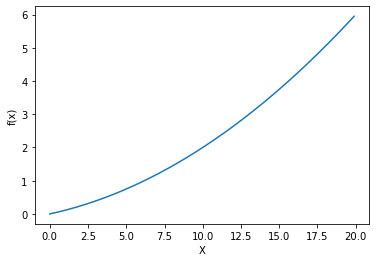

In [11]:
import numpy as np
import matplotlib.pylab as plt

# 0~20까지 0.1 간격 배열의 x
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("X")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [12]:
# x = 5

numerical_diff(function_1, 5)

1.9999999999908982e-09

In [13]:
# x = 10

numerical_diff(function_1, 10)

2.999999999986347e-09

In [14]:
# 함수 for 편미분
# y = x0^2 + x1^2

def function_2(x):
    return x[0]**2 + x[1]**2

In [15]:
# x0 = 3, x1 = 4일 때 x0에 대한 편미분계수
# x1값 상수취급

def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.000000000003781e-08

In [16]:
# x0 = 3, x1 = 4 일 때 x1에 대한 편미분계수
# x0값 상수취급

def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119e-08

## 4.4. 기울기

In [17]:
# 기울기 구현

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)    # x와 같은 shape 배열, 0으로 채움
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2)/(2*h)
        x[idx] = tmp_val      # 값 복원
    
    return grad

In [18]:
# (3,4)

numerical_gradient(function_2, np.array([3.0,4.0]))

array([6., 8.])

In [19]:
# (0,2)

numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [20]:
# (3,0)

numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

In [21]:
# gradient descent

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad
    
    return x

In [22]:
# f(x0, x1) = x0^2 + x1^2 최솟값 구하기

def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [23]:
# 학습률 너무 크면




In [24]:
# 학습률 너무 작으면 



In [27]:
# gradient_simplent.py

import sys, os
# sys.path.append(os.pardir)

import numpy as np

# 하위 디렉토리에 common 폴더 안에 Ch3부터 만든 함수들 넣어두고
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
    
        return loss

In [28]:
# 실험

## 4.5. 학습 알고리즘 구현하기

In [35]:
# 2층 신경망 클래스

import sys, os
# sys.path.append(os.pardir)

from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size,hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self,x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # x: 입력데이터
    # t: 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y,t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    
    # gradient
    def numerical_gradient(self, x, t):
        # loss function
        loss_W = lambda W: self.loss(x,t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [36]:
# 예시

net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [37]:
x = np.random.rand(100,784)
y = net.predict(x)
y

array([[0.09780667, 0.10507606, 0.10466475, 0.09977941, 0.09108513,
        0.10051071, 0.0961527 , 0.10623715, 0.10184363, 0.0968438 ],
       [0.09775421, 0.10506983, 0.1045852 , 0.09998866, 0.09085307,
        0.10009818, 0.09677391, 0.10608821, 0.10143692, 0.09735182],
       [0.09770489, 0.10473137, 0.10499407, 0.10005876, 0.09081502,
        0.10021762, 0.09643362, 0.10607399, 0.10158995, 0.09738072],
       [0.09767249, 0.10509975, 0.1043802 , 0.09996682, 0.09074186,
        0.10039448, 0.09635894, 0.1059919 , 0.10167505, 0.09771852],
       [0.09747825, 0.10543417, 0.104512  , 0.09981764, 0.09106506,
        0.10025373, 0.09647389, 0.10635074, 0.10148555, 0.09712898],
       [0.09762447, 0.10525363, 0.10436676, 0.09951319, 0.09086599,
        0.10028368, 0.09643758, 0.10629731, 0.10154275, 0.09781464],
       [0.09741043, 0.105173  , 0.10414166, 0.10014444, 0.09098623,
        0.10050211, 0.09639515, 0.10640412, 0.10123088, 0.09761197],
       [0.09790734, 0.10503647, 0.1042591

In [38]:
# 미니배치 학습 구현

import numpy as np
from mnist import load_mnist

# 위의 TwoLayerNet 클래스 사용

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list=[]

# hyperparameters
iters_num = 10000     # 미니배치로 학습시키는 횟수
train_size = x_train.shape[0]
batch_size = 100      # 60000개 데이터에서 임의로 100개씩 뽑아서
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 한 번에 minibatch 만큼 뽑아서 학습 -> 10000번
for i in range(iters_num):
    # get minibatch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # gradient
    grad = network.numerical_gradient(x_batch, t_batch)
    
    # update params
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

KeyboardInterrupt: 

In [39]:
train_loss_list

[2.2942045397766893,
 2.2985827060838147,
 2.298191802442777,
 2.2883365756330356,
 2.2831202722733295,
 2.289759391150756,
 2.296208972236112,
 2.2817541953040767,
 2.291333328939462,
 2.294243511105076,
 2.309259547315103,
 2.2892277571226374,
 2.2942905496999866,
 2.2860751060624147,
 2.2973922642377858]

In [ ]:
# 시험데이터 평가 추가

# 미니배치 학습 구현

import numpy as np
from mnist import load_mnist

# 위의 TwoLayerNet 클래스 사용

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list=[]
train_acc_list=[]
test_acc_list=[]

# hyperparameters
iters_num = 10000     # 미니배치로 학습시키는 횟수
train_size = x_train.shape[0]
batch_size = 100      # 60000개 데이터에서 임의로 100개씩 뽑아서
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 1 epoch당 반복 수
iter_per_epoch = max(train_size / batch_size, 1) 

# 한 번에 minibatch 만큼 뽑아서 학습 -> 10000번
for i in range(iters_num):
    # get minibatch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # gradient
    grad = network.numerical_gradient(x_batch, t_batch)
    
    # update params
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1 epoch 당 정확도 계산
    if i%iter_per_epoch == 0 :
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", "+ str(test_acc))

train acc, test acc | 0.09751666666666667, 0.0974


In [ ]:
import matplotlib.pylab as plt

# 0~20까지 0.1 간격 배열의 x
x = np.arange(0, 16)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(x, train_acc_list)
plt.plot(x, test_acc_list)
plt.show()